# Employment Across Geographical Regions and Unemployment Rates

The purpose of this notebook is to explore the employment landscape in Mexico. This notebook dives into two metrics for economic opportunity:
1. The rate of informal employment across regions of Mexico
2. The unemployment rate over time in Mexico as a whole, broken down across age and sex   
   
The datasets used for this notebook are pulled from two sources. The first source, for the informal employment rate figures, was the National Institute of Statistics, Geography and Informatics (INEGI) Indicators Bank. This can be found by going to INEGI's website, going to "Query Systems", and going to the "Indicators Bank" (https://en.www.inegi.org.mx/app/indicadores/). Here, the following datasets were queried using the "Municipal" and "00 United Mexican States" filters:   
- Employed population in the informal sector-15 years and over (People), Estados Unidos Mexicanos, 2024 4T
- Employed population-15 years and over (People), Estados Unidos Mexicanos, 2024 4T
- Unemployed population-15 years and over (People), Estados Unidos Mexicanos, 2024 4T
These datsets were downloaded as a single csv file and was translated.   

The second source, for unemployment over time in Mexico, was taken from the National Survey of Occupation and Employment (ENOE), population aged 15 years and over (https://en.www.inegi.org.mx/programas/enoe/15ymas/#tabular_data). The queries for each dataset used were as follows:
- Employed population from 2005 to 2024, broken down by age
- Employed population from 2005 to 2024, broken down by sex
- Unemployed population from 2005 to 2024, broken down by age
- Unemployed population from 2005 to 2024, broken down by sex

The resulting csv files were not initially readable as they had an unusual structure, so they were cleaned and then imported to this notebook.

The following show the code used to analyze the datasets, and some commentary on the figures is provided.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in dataset
df = pd.read_csv('datasets/Employment_Mexico_Region_2021_2024.csv', encoding="ISO-8859-1") #Latin-1 encoding
df.head(5)

,Indicator,Geographic area,2023/01,2023/02,2023/03,2023/04,2024/01,2024/02,2024/03,2024/04
0,Employed population in informal sector 15 yrs ...,00 Estados Unidos Mexicanos,16506302,16535606,16707970,16789898,16459370,16691011,16730767,17020710
1,Employed population in informal sector 15 yrs ...,01 Aguascalientes,128351,131325,136125,126344,127771,134214,137393,153072
2,Employed population in informal sector 15 yrs ...,02 Baja California,333103,329676,338955,364927,327536,314600,327759,333045
3,Employed population in informal sector 15 yrs ...,03 Baja California Sur,78518,82645,85367,84856,83925,82665,81402,80958
4,Employed population in informal sector 15 yrs ...,04 Campeche,121152,121715,113400,116863,120117,119864,122121,124696


In [3]:
# Separate the informal class from the total working population
informal = df[df['Indicator'].str.contains('informal sector')].reset_index(drop=True)
employed = df[df['Indicator'].str.contains('Employed population-15 years and over')].reset_index(drop=True)
unemployed = df[df['Indicator'].str.contains('Unemployed')].reset_index(drop=True)

## Informal employement rate
This is calculated by dividing the population employed in the informal sector by the total employed population

In [31]:
# Perform the division
prop_informal = (informal.iloc[:, 3:].div(employed.iloc[:, 3:]))*100
prop_informal.insert(0, 'Geographic area', informal['Geographic area'])

# Trim the numbers off geographic area (first 3 characters)
prop_informal['Geographic area'] = prop_informal['Geographic area'].apply(lambda x: x[3:])
prop_informal

,Geographic area,2023/02,2023/03,2023/04,2024/01,2024/02,2024/03,2024/04
0,Estados Unidos Mexicanos,28.255372,28.238438,28.263943,27.840186,28.133844,28.105592,28.612224
1,Aguascalientes,20.596608,20.439005,19.767937,19.241432,20.548977,20.807033,23.083535
2,Baja California,18.276942,18.706291,20.103280,18.403080,17.529636,18.490683,18.804065
3,Baja California Sur,18.113893,18.545384,18.466828,18.627151,18.128369,17.364649,17.770393
4,Campeche,28.113530,26.063633,26.463901,26.869949,27.261459,28.049161,28.477664
5,Coahuila de Zaragoza,21.605878,20.283635,22.781442,20.662238,21.477713,21.279053,21.842976
6,Colima,17.830578,18.575827,20.498189,18.062313,17.327067,17.389508,17.844790
7,Chiapas,26.127061,25.264870,28.304985,26.870770,27.071403,26.376130,28.902550
8,Chihuahua,15.602127,15.649431,15.237447,15.180829,15.151649,16.047791,14.757666
9,Ciudad de México,29.215083,29.713872,28.474413,28.077108,27.268139,26.775015,26.995207


### Visualization

Horizontal bar graph showing informal employement rate by region

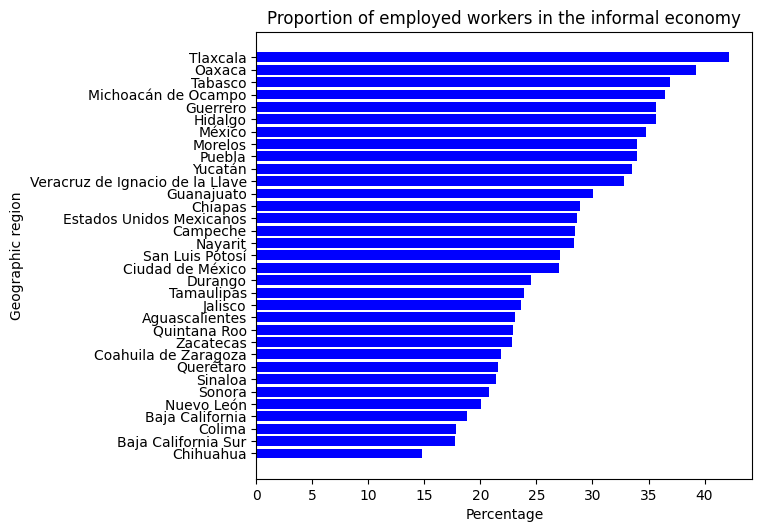

In [32]:
# Select and sort data for visual
data = prop_informal[['Geographic area', '2024/04']].sort_values(by='2024/04', ascending=True)

y_pos = np.arange(len(data['2024/04']))
plt.figure(figsize=(6.4, 5.8))
plt.barh(y_pos, data['2024/04'], color = 'blue')
plt.yticks(y_pos, data['Geographic area'])
plt.ylabel('Geographic region')
plt.xlabel('Percentage')
plt.title('Proportion of employed workers in the informal economy')
plt.show()

This figure shows that each region has between 15 and 40% of their workers engaged in some job that's outside of formal regulations and protection, with the highest region being Tlaxcala.

## Unemployment Rate By Region

Calculated by dividing the unemployed population by the total working population (employed + unemployed)

In [29]:
# Calculate unemployement rate
percent_unemployed_pop = (unemployed.iloc[:, 2:].div(unemployed.iloc[:, 2:].add(employed.iloc[:, 2:])))*100

# Insert trimmed geographical region column
percent_unemployed_pop.insert(0, 'Geographic area', employed['Geographic area'].apply(lambda x: x[3:]))
percent_unemployed_pop

,Geographic area,2023/01,2023/02,2023/03,2023/04,2024/01,2024/02,2024/03,2024/04
0,Estados Unidos Mexicanos,2.658014,2.813920,2.992484,2.685028,2.542261,2.668339,3.001589,2.567794
1,Aguascalientes,3.019623,3.197964,3.177382,3.505813,3.000375,3.359917,4.234552,2.264598
2,Baja California,1.712216,2.307428,2.438888,2.245394,2.125665,2.737711,2.723321,2.459102
3,Baja California Sur,2.759362,2.700697,3.186157,2.263339,2.220775,2.413354,2.520477,1.888881
4,Campeche,1.762395,1.759048,1.819244,1.715112,1.562558,1.997789,1.950928,1.897424
5,Coahuila de Zaragoza,3.628332,3.702727,3.877425,4.339676,4.167031,3.714130,4.148794,3.502163
6,Colima,2.134776,2.206550,2.559653,2.303362,2.105770,2.111355,2.339617,2.234167
7,Chiapas,2.488010,1.839134,2.478771,1.734759,1.697587,1.574721,1.969873,2.759663
8,Chihuahua,2.784415,2.478518,2.814975,1.929825,2.238355,2.534668,2.624630,2.121257
9,Ciudad de México,3.752551,4.369547,4.066496,3.909037,3.970805,4.040158,3.964681,3.989185


### Visualization

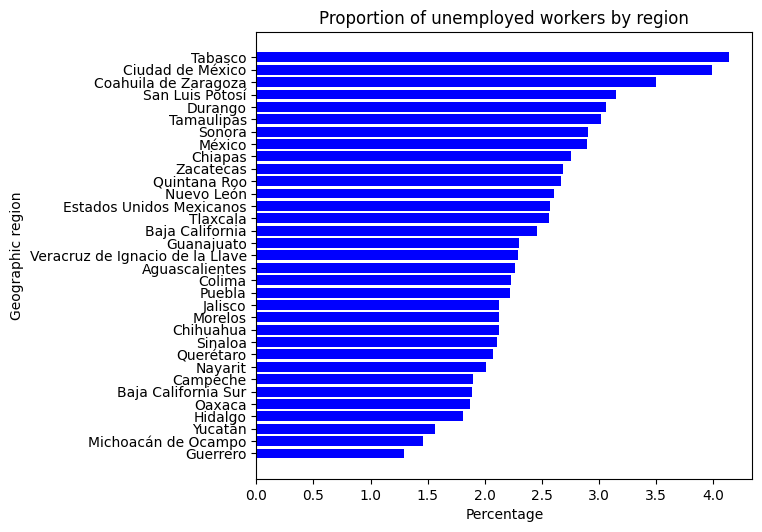

In [30]:
# Select and sort data for visual
data = percent_unemployed_pop[['Geographic area', '2024/04']].sort_values(by='2024/04', ascending=True)

y_pos = np.arange(len(data['2024/04']))
plt.figure(figsize=(6.4, 5.8))
plt.barh(y_pos, data['2024/04'], color = 'blue')
plt.yticks(y_pos, data['Geographic area'])
plt.ylabel('Geographic region')
plt.xlabel('Percentage')
plt.title('Proportion of unemployed workers by region')
plt.show()

An interesting takeaway from this figure that the highest region has an unemployment rate of just around 4%, which seems rather low.

## Unemployment Over Time


Import the employed dataset by age and clean it

In [8]:
# Import employed population dataset
employed_2005_2024 = pd.read_csv("datasets/Employed_Population_Age_2005_2024.csv", encoding="ISO-8859-1")
employed_2005_2024.head(5)

,,Total,15 a 19 años,20 a 29 años,30 a 39 años,40 a 49 años,50 a 59 años,60 años y más,No especificado
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cuarto trimestre del 2024,59487546|0.440702676030361|262163.207126792|,3122540|1.79026373522266|55901.7012378216|,12523264|0.94043878469175|117773.631765339|,13889136|0.878806653173317|122058.65123629|,12947155|0.896309692556786|116046.605175351|,10636896|0.910740378453797|96874.5068861368|,6339090|1.24879695580088|79162.3629454782|,29465|14.4849148293776|4267.98015447611|
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tercer trimestre del 2024,59528249|0.472733012217966|281409.684618311|,3227306|1.80741115616797|58330.6886876781|,12552295|0.950147114573134|119265.268755208|,13837893|0.890502778291283|123226.821621975|,12830772|0.90239164168582|115783.814091765|,10636364|0.930150889568007|98934.2343636913|,6406768|1.29476075852083|82952.3179534696|,36851|14.7715604124427|5443.46772758926|
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Clean
employed_2005_2024.dropna(axis = 0, how = 'any', inplace = True) #Drop NaNs
employed_2005_2024.columns = employed_2005_2024.columns.str.strip() #Remove whitespace from columns

In [10]:
print(employed_2005_2024.columns)

Index(['', 'Total', '15 a 19 años', '20 a 29 años', '30 a 39 años',
       '40 a 49 años', '50 a 59 años', '60 años y más', 'No especificado'],
      dtype='object')


In [11]:
# Preserve just the number before the first "|", as the other numbers represent the coefficient of variation
# and the standard error
employed_2005_2024.iloc[:, 1:] = employed_2005_2024.iloc[:, 1:].map(lambda x: int(x[:x.index("|")]))

employed_2005_2024

,,Total,15 a 19 años,20 a 29 años,30 a 39 años,40 a 49 años,50 a 59 años,60 años y más,No especificado
1,Cuarto trimestre del 2024,59487546,3122540,12523264,13889136,12947155,10636896,6339090,29465
3,Tercer trimestre del 2024,59528249,3227306,12552295,13837893,12830772,10636364,6406768,36851
5,Segundo trimestre del 2024,59327161,3160936,12765509,13698350,12836391,10544361,6287231,34383
7,Primer trimestre del 2024,59120905,3097245,12814108,13521964,12715532,10627634,6317721,26701
9,Cuarto trimestre del 2023,59403947,3125616,12851170,13696849,12828342,10448286,6412821,40863
...,...,...,...,...,...,...,...,...,...
149,Primer trimestre del 2006,41870275,3557123,10212134,10833273,8657599,5194543,3394318,21285
151,Cuarto trimestre del 2005,42863703,3768863,10599516,10864900,8845986,5272819,3494764,16855
153,Tercer trimestre del 2005,42334898,3822004,10397559,10709417,8745991,5171940,3467752,20235
155,Segundo trimestre del 2005,41676868,3620189,10366230,10618884,8571528,5151146,3333231,15660


Import the unemployed dataset by age and clean it

In [12]:
# Import the unemployed dataset
unemployed_2005_2024 = pd.read_csv('datasets/Unemployed_Population_Age_2005_2024.csv', encoding='ISO-8859-1')
unemployed_2005_2024.head(5)

,,Cuarto trimestre del 2024,Tercer trimestre del 2024,Segundo trimestre del 2024,Primer trimestre del 2024,Cuarto trimestre del 2023,Tercer trimestre del 2023,Segundo trimestre del 2023,Primer trimestre del 2023,Cuarto trimestre del 2022,...,Segundo trimestre del 2007,Primer trimestre del 2007,Cuarto trimestre del 2006,Tercer trimestre del 2006,Segundo trimestre del 2006,Primer trimestre del 2006,Cuarto trimestre del 2005,Tercer trimestre del 2005,Segundo trimestre del 2005,Primer trimestre del 2005
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,1567775|2.46168174353826|38593.6309547569|,1842085|2.34376966118831|43174.2293633007|,1626449|2.3566018454076|38328.9271486134|,1542215|2.52584508021401|38953.9617038224|,1639021|2.47761264180856|40608.5914978971|,1825196|2.34337281875468|42771.1469529977|,1694442|2.38022894351238|40331.5989150301|,1597182|2.39277300183923|38216.9396862358|,1796103|2.38037311665023|42753.9529593482|,...,1489721|2.36846543105626|35283.5269041856|,1755167|2.13400776765517|37455.4001153202|,1605212|2.2463134551165|36058.0931391447|,1774900|2.11199861969612|37485.8635009864|,1370261|2.30111617545418|31531.2975169402|,1530073|2.1577609941752|33015.3183764064|,1381816|2.42022695295849|33443.0832722929|,1665306|2.21046082026225|36810.9366674765|,1503565|2.23655158720472|33628.0068721546|,1658771|2.4138547687577|40040.3228862697|
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15 a 19 años,173105|6.59068245528421|11408.8008642197|,213498|5.89485891802313|12585.405892801|,188701|6.51508445138855|12294.0295106147|,153019|6.57404787069799|10059.5423112634|,210565|6.02583959353109|12688.3091401187|,215693|5.76217923287919|12428.6172527741|,168945|6.72743712525735|11365.668651266|,189510|6.43767142965035|12200.0311263304|,207926|6.30674046706315|13113.3531835457|,...,278265|4.86402830620388|13534.8883662582|,329613|4.63419594900864|15274.9122934058|,304338|4.85917311406425|14788.3102718809|,363801|4.24456409251462|15441.7666142091|,264359|4.8648089277049|12860.5602331914|,279331|5.04583640118243|14094.5852777869|,260019|4.88129070443692|12692.2832767698|,361375|4.22857283856334|15281.0050953583|,272925|4.83169945526018|13186.9157382688|,312817|4.80327614362127|15025.4643341918|
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Drop rows with all NaNs
unemployed_2005_2024.dropna(axis = 0, how = 'all', inplace = True)

# Drop the coefficient of variation and standard error data, handle strings that don't contain "|"
unemployed_2005_2024.iloc[:, 1:] = unemployed_2005_2024.iloc[:, 1:].map(lambda x: int(x[:x.index("|")]) if "|" in x else np.nan)

unemployed_2005_2024

,,Cuarto trimestre del 2024,Tercer trimestre del 2024,Segundo trimestre del 2024,Primer trimestre del 2024,Cuarto trimestre del 2023,Tercer trimestre del 2023,Segundo trimestre del 2023,Primer trimestre del 2023,Cuarto trimestre del 2022,...,Segundo trimestre del 2007,Primer trimestre del 2007,Cuarto trimestre del 2006,Tercer trimestre del 2006,Segundo trimestre del 2006,Primer trimestre del 2006,Cuarto trimestre del 2005,Tercer trimestre del 2005,Segundo trimestre del 2005,Primer trimestre del 2005
1,Total,1567775,1842085,1626449,1542215,1639021,1825196,1694442,1597182,1796103,...,1489721,1755167,1605212,1774900,1370261,1530073,1381816,1665306,1503565,1658771
3,15 a 19 años,173105,213498,188701,153019,210565,215693,168945,189510,207926,...,278265,329613,304338,363801,264359,279331,260019,361375,272925,312817
5,20 a 29 años,655796,759848,654991,657397,677139,760442,673104,626063,721108,...,600953,709603,646015,686452,537787,627945,558218,634890,571879,663107
7,30 a 39 años,335144,384209,320964,336144,312240,351351,363961,318083,366299,...,296893,334619,318895,329525,258536,285510,254503,309937,302194,330290
9,40 a 49 años,184679,255040,216189,196452,199196,240350,239829,243025,258281,...,178871,213689,173861,226672,167818,191246,172375,203073,181034,205780
11,50 a 59 años,156835,162577,173729,147977,160466,178641,179574,162142,171979,...,95543,113321,110204,124198,99600,95733,98446,105923,117768,96012
13,60 años y más,61983,66632,71258,50500,79122,74607,68193,58071,68938,...,38508,54260,51338,44191,42088,49745,37648,49707,56818,50587
15,No especificado,233,281,617,726,293,4112,836,288,1572,...,688,62,561,61,73,563,607,401,947,178


Align the cells of the two dataframes

In [14]:
# Align the columns to do element-wise calculations
employed_2005_2024 = employed_2005_2024.transpose() #swap rows with columns in employed dataset

employed_2005_2024.columns = employed_2005_2024.iloc[0] #assign the first row as column headers
employed_2005_2024 = employed_2005_2024.iloc[1:, :] #drop the first row

unemployed_2005_2024.set_index(' ', inplace=True) #set the correct index in the unemployed dataset

# Display employed dataset
employed_2005_2024

,Cuarto trimestre del 2024,Tercer trimestre del 2024,Segundo trimestre del 2024,Primer trimestre del 2024,Cuarto trimestre del 2023,Tercer trimestre del 2023,Segundo trimestre del 2023,Primer trimestre del 2023,Cuarto trimestre del 2022,Tercer trimestre del 2022,...,Segundo trimestre del 2007,Primer trimestre del 2007,Cuarto trimestre del 2006,Tercer trimestre del 2006,Segundo trimestre del 2006,Primer trimestre del 2006,Cuarto trimestre del 2005,Tercer trimestre del 2005,Segundo trimestre del 2005,Primer trimestre del 2005
Total,59487546,59528249,59327161,59120905,59403947,59167472,58521990,58492126,58349353,57440441,...,43245283,42717453,43109908,42776447,42351538,41870275,42863703,42334898,41676868,41441076
15 a 19 años,3122540,3227306,3160936,3097245,3125616,3260249,3200576,3147147,3247593,3245816,...,3648649,3628315,3738053,3753466,3676353,3557123,3768863,3822004,3620189,3702656
20 a 29 años,12523264,12552295,12765509,12814108,12851170,12720781,12758095,12782349,12835781,12703584,...,10468918,10418468,10552155,10498262,10358030,10212134,10599516,10397559,10366230,10413338
30 a 39 años,13889136,13837893,13698350,13521964,13696849,13624418,13425354,13454441,13294901,13077963,...,10959195,10751026,10826280,10770553,10759861,10833273,10864900,10709417,10618884,10449539
40 a 49 años,12947155,12830772,12836391,12715532,12828342,12699831,12699638,12882298,12936348,12739695,...,9168342,8997550,9079699,8988333,8849259,8657599,8845986,8745991,8571528,8504957
50 a 59 años,10636896,10636364,10544361,10627634,10448286,10382519,10239572,10170051,10038156,9858275,...,5537084,5518668,5432506,5321889,5273485,5194543,5272819,5171940,5151146,5070254
60 años y más,6339090,6406768,6287231,6317721,6412821,6438578,6164837,6020654,5957943,5773466,...,3447654,3381655,3461283,3425429,3415891,3394318,3494764,3467752,3333231,3290486
No especificado,29465,36851,34383,26701,40863,41096,33918,35186,38631,41642,...,15441,21771,19932,18515,18659,21285,16855,20235,15660,9846


In [15]:
# Display unemployed dataset
unemployed_2005_2024

,Cuarto trimestre del 2024,Tercer trimestre del 2024,Segundo trimestre del 2024,Primer trimestre del 2024,Cuarto trimestre del 2023,Tercer trimestre del 2023,Segundo trimestre del 2023,Primer trimestre del 2023,Cuarto trimestre del 2022,Tercer trimestre del 2022,...,Segundo trimestre del 2007,Primer trimestre del 2007,Cuarto trimestre del 2006,Tercer trimestre del 2006,Segundo trimestre del 2006,Primer trimestre del 2006,Cuarto trimestre del 2005,Tercer trimestre del 2005,Segundo trimestre del 2005,Primer trimestre del 2005
,,,,,,,,,,,,,,,,,,,,,
Total,1567775,1842085,1626449,1542215,1639021,1825196,1694442,1597182,1796103,2040030,...,1489721,1755167,1605212,1774900,1370261,1530073,1381816,1665306,1503565,1658771
15 a 19 años,173105,213498,188701,153019,210565,215693,168945,189510,207926,215087,...,278265,329613,304338,363801,264359,279331,260019,361375,272925,312817
20 a 29 años,655796,759848,654991,657397,677139,760442,673104,626063,721108,797330,...,600953,709603,646015,686452,537787,627945,558218,634890,571879,663107
30 a 39 años,335144,384209,320964,336144,312240,351351,363961,318083,366299,417937,...,296893,334619,318895,329525,258536,285510,254503,309937,302194,330290
40 a 49 años,184679,255040,216189,196452,199196,240350,239829,243025,258281,297965,...,178871,213689,173861,226672,167818,191246,172375,203073,181034,205780
50 a 59 años,156835,162577,173729,147977,160466,178641,179574,162142,171979,230847,...,95543,113321,110204,124198,99600,95733,98446,105923,117768,96012
60 años y más,61983,66632,71258,50500,79122,74607,68193,58071,68938,79994,...,38508,54260,51338,44191,42088,49745,37648,49707,56818,50587
No especificado,233,281,617,726,293,4112,836,288,1572,870,...,688,62,561,61,73,563,607,401,947,178


In [16]:
# Clean index and column headers for alignment
employed_2005_2024.index = employed_2005_2024.index.str.strip()
unemployed_2005_2024.index = unemployed_2005_2024.index.str.strip()
employed_2005_2024.columns = employed_2005_2024.columns.str.strip()
unemployed_2005_2024.columns = unemployed_2005_2024.columns.str.strip()

Calculate the unemployment rate for each data point

In [17]:
# Perform calculation
unemployment_rate_2005_2024 = (unemployed_2005_2024/(unemployed_2005_2024+employed_2005_2024))*100
unemployment_rate_2005_2024

,Cuarto trimestre del 2024,Tercer trimestre del 2024,Segundo trimestre del 2024,Primer trimestre del 2024,Cuarto trimestre del 2023,Tercer trimestre del 2023,Segundo trimestre del 2023,Primer trimestre del 2023,Cuarto trimestre del 2022,Tercer trimestre del 2022,...,Segundo trimestre del 2007,Primer trimestre del 2007,Cuarto trimestre del 2006,Tercer trimestre del 2006,Segundo trimestre del 2006,Primer trimestre del 2006,Cuarto trimestre del 2005,Tercer trimestre del 2005,Segundo trimestre del 2005,Primer trimestre del 2005
,,,,,,,,,,,,,,,,,,,,,
Total,2.567794,3.001589,2.668339,2.542261,2.685028,2.992484,2.81392,2.658014,2.986265,3.429748,...,3.330101,3.946624,3.589864,3.983942,3.134045,3.525486,3.123064,3.784769,3.482052,3.84867
15 a 19 años,5.252538,6.204887,5.633476,4.707894,6.311558,6.205311,5.013917,5.679637,6.017215,6.214765,...,7.086099,8.327918,7.528663,8.835983,6.708407,7.280968,6.453875,8.638352,7.010455,7.79029
20 a 29 años,4.976045,5.707931,4.880526,4.879908,5.005348,5.640749,5.011496,4.669181,5.319126,5.905748,...,5.428726,6.376694,5.768934,6.137412,4.93572,5.792808,5.002969,5.754751,5.228317,5.986641
30 a 39 años,2.35614,2.701492,2.289442,2.425613,2.228839,2.514001,2.639442,2.309548,2.681309,3.09677,...,2.637622,3.018489,2.861283,2.968673,2.346403,2.567817,2.288819,2.81266,2.767071,3.063963
40 a 49 años,1.406346,1.948981,1.656293,1.52147,1.529038,1.857393,1.853469,1.851573,1.957471,2.285418,...,1.913629,2.319872,1.878855,2.459814,1.861113,2.161254,1.911378,2.269209,2.068354,2.362372
50 a 59 años,1.453019,1.50549,1.620895,1.373259,1.512581,1.69149,1.7235,1.569289,1.684395,2.288078,...,1.696242,2.012096,1.988269,2.2805,1.853684,1.809603,1.832827,2.00693,2.235148,1.858441
60 años y más,0.968322,1.02932,1.120675,0.793,1.218772,1.145476,1.094059,0.955315,1.143842,1.366611,...,1.104596,1.579201,1.46153,1.273655,1.217127,1.44437,1.065787,1.413151,1.676023,1.514094
No especificado,0.784565,0.75676,1.762857,2.647027,0.711925,9.095735,2.405479,0.811862,3.910156,2.046481,...,4.265609,0.283974,2.73752,0.328381,0.389707,2.576895,3.47612,1.943206,5.702415,1.775738


In [18]:
# Translate dataset
years_translate = {
    'Total': 'Total',
    '15 a 19 años': '15-19 yrs',
    '20 a 29 años': '20-29 yrs',
    '30 a 39 años': '30-39 yrs',
    '40 a 49 años': '40-49 yrs',
    '50 a 59 años': '50-59 yrs',
    '60 años y más': '60 yrs+',
    'No especificado': 'Unspecified'
}

def translate_quarters(item):
    if 'Cuarto trimestre de' in item:
        return item.replace('Cuarto trimestre del', 'Q4')
    if 'Tercer trimestre del' in item:
        return item.replace('Tercer trimestre del', 'Q3')
    if 'Segundo trimestre del' in item:
        return item.replace('Segundo trimestre del', 'Q2')
    if 'Primer trimestre del' in item:
        return item.replace('Primer trimestre del', 'Q1')

unemployment_rate_2005_2024.index = unemployment_rate_2005_2024.index.map(years_translate)
unemployment_rate_2005_2024.columns = unemployment_rate_2005_2024.columns.map(translate_quarters)

unemployment_rate_2005_2024

,Q4 2024,Q3 2024,Q2 2024,Q1 2024,Q4 2023,Q3 2023,Q2 2023,Q1 2023,Q4 2022,Q3 2022,...,Q2 2007,Q1 2007,Q4 2006,Q3 2006,Q2 2006,Q1 2006,Q4 2005,Q3 2005,Q2 2005,Q1 2005
,,,,,,,,,,,,,,,,,,,,,
Total,2.567794,3.001589,2.668339,2.542261,2.685028,2.992484,2.81392,2.658014,2.986265,3.429748,...,3.330101,3.946624,3.589864,3.983942,3.134045,3.525486,3.123064,3.784769,3.482052,3.84867
15-19 yrs,5.252538,6.204887,5.633476,4.707894,6.311558,6.205311,5.013917,5.679637,6.017215,6.214765,...,7.086099,8.327918,7.528663,8.835983,6.708407,7.280968,6.453875,8.638352,7.010455,7.79029
20-29 yrs,4.976045,5.707931,4.880526,4.879908,5.005348,5.640749,5.011496,4.669181,5.319126,5.905748,...,5.428726,6.376694,5.768934,6.137412,4.93572,5.792808,5.002969,5.754751,5.228317,5.986641
30-39 yrs,2.35614,2.701492,2.289442,2.425613,2.228839,2.514001,2.639442,2.309548,2.681309,3.09677,...,2.637622,3.018489,2.861283,2.968673,2.346403,2.567817,2.288819,2.81266,2.767071,3.063963
40-49 yrs,1.406346,1.948981,1.656293,1.52147,1.529038,1.857393,1.853469,1.851573,1.957471,2.285418,...,1.913629,2.319872,1.878855,2.459814,1.861113,2.161254,1.911378,2.269209,2.068354,2.362372
50-59 yrs,1.453019,1.50549,1.620895,1.373259,1.512581,1.69149,1.7235,1.569289,1.684395,2.288078,...,1.696242,2.012096,1.988269,2.2805,1.853684,1.809603,1.832827,2.00693,2.235148,1.858441
60 yrs+,0.968322,1.02932,1.120675,0.793,1.218772,1.145476,1.094059,0.955315,1.143842,1.366611,...,1.104596,1.579201,1.46153,1.273655,1.217127,1.44437,1.065787,1.413151,1.676023,1.514094
Unspecified,0.784565,0.75676,1.762857,2.647027,0.711925,9.095735,2.405479,0.811862,3.910156,2.046481,...,4.265609,0.283974,2.73752,0.328381,0.389707,2.576895,3.47612,1.943206,5.702415,1.775738


### Visualization

Unemployment rate over time, overall

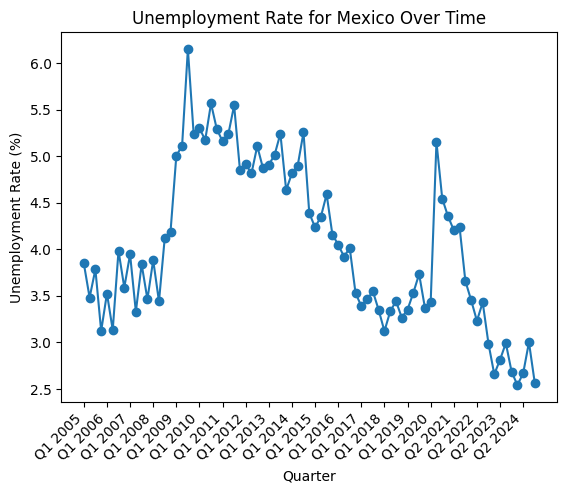

In [19]:
# Select data
x = unemployment_rate_2005_2024.columns[::-1] #go from oldest to most recent data
x_pos = np.arange(0, len(x), 4) #select every fourth xtick to prevent overcrowding in the visual
y = unemployment_rate_2005_2024.iloc[0, ::-1]
labels = x[::4] #select every fourth label

# Plot line chart
plt.figure()
plt.plot(x, y)
plt.scatter(x, y) #add dots to each data point
plt.xticks(x_pos, labels)
plt.xticks(rotation = 45, ha= 'right')
plt.xlabel('Quarter')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate for Mexico Over Time')
plt.show()

This figure shows and interesting trend. Here, unemployment is at an all time low. The maximum was at 6%, in 2009.

Unemployment rate over time, broken down by age

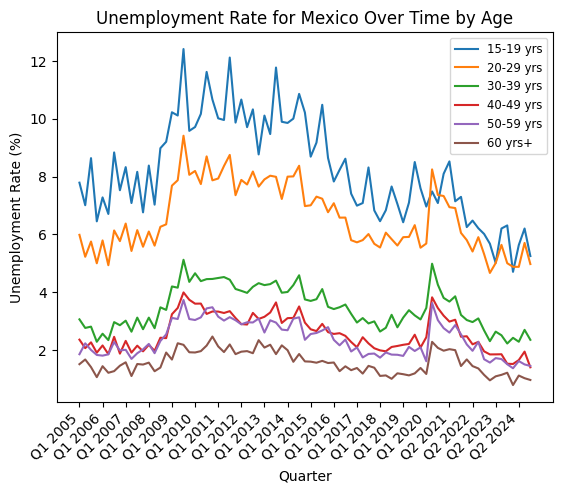

In [20]:
# Plot data
plt.figure()
for i in range(1, 7): # range(1, 7) represents the 6 age brackets in the data, excluding total and unspecified
    plt.plot(x, unemployment_rate_2005_2024.iloc[i, ::-1], label=unemployment_rate_2005_2024.index[i])
plt.xticks(x_pos, labels)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Quarter')
plt.ylabel('Unemployment Rate (%)')
plt.legend(fontsize = 'small')
plt.title('Unemployment Rate for Mexico Over Time by Age')
plt.show()

The key takeaway here is that there is a clear separation in the rate range for each age bracket. As you move up through each age bracket, the unemployment rate decreases.

## Unemployment Rate Over Time Across Men and Women

In [21]:
# Import datasets
employed_population_sex_0524 = pd.read_csv('datasets/Employed_Population_Sex_2005_2024.csv', encoding='ISO-8859-1')
unemployed_population_sex_0524 = pd.read_csv('datasets/Unemployed_Population_Sex_2005_2024.csv', encoding='ISO-8859-1')

In [22]:
employed_population_sex_0524.head(5)

,,Total,Hombre,Mujer
0,NaN,NaN,NaN,NaN
1,Cuarto trimestre del 2024,59487546|0.440702676030361|262163.207126792|,34924786|0.497269244763159|173670.21957735|,24562760|0.626016548095828|153766.942269063|
2,NaN,NaN,NaN,NaN
3,Tercer trimestre del 2024,59528249|0.472733012217966|281409.684618311|,35255385|0.537161778857042|189378.453208899|,24272864|0.6410227615938|155594.583130707|
4,NaN,NaN,NaN,NaN


In [23]:
unemployed_population_sex_0524.head(5)

,,Total,Hombre,Mujer
0,NaN,NaN,NaN,NaN
1,Cuarto trimestre del 2024,1567775|2.46168174353826|38593.6309547569|,942762|3.15574642904379|29751.1781493818|,625013|3.70345083222481|23147.0491500132|
2,NaN,NaN,NaN,NaN
3,Tercer trimestre del 2024,1842085|2.34376966118831|43174.2293633007|,1079573|3.0972633374874|33437.2187304129|,762512|3.33645427998012|25440.864259362|
4,NaN,NaN,NaN,NaN


Clean datasets

In [24]:
# Drop empty rows
employed_population_sex_0524.dropna(axis=0, how='all', inplace=True)
unemployed_population_sex_0524.dropna(axis=0, how='all', inplace=True)

# Set the first column as the index
employed_population_sex_0524.set_index(' ', inplace=True)
unemployed_population_sex_0524.set_index(' ', inplace=True)

# Clean whitespace from column headers and the index
employed_population_sex_0524.columns = employed_population_sex_0524.columns.map(lambda x: x.strip())
employed_population_sex_0524.index = employed_population_sex_0524.index.map(lambda x: x.strip())
unemployed_population_sex_0524.columns = employed_population_sex_0524.columns.map(lambda x: x.strip())
unemployed_population_sex_0524.index = unemployed_population_sex_0524.index.map(lambda x: x.strip())

# Translate datasets

# Column headers
sex_translate = {
    'Total': 'Total',
    'Hombre': 'Men',
    'Mujer': 'Women'
}

employed_population_sex_0524.columns = employed_population_sex_0524.columns.map(sex_translate)
unemployed_population_sex_0524.columns = unemployed_population_sex_0524.columns.map(sex_translate)

# Index
employed_population_sex_0524.index = employed_population_sex_0524.index.map(translate_quarters)
unemployed_population_sex_0524.index = unemployed_population_sex_0524.index.map(translate_quarters)

# Extract numbers before the first "|"
employed_population_sex_0524 = employed_population_sex_0524.map(lambda x: int(x[:x.index("|")]) if "|" in x else int(x))
unemployed_population_sex_0524 = unemployed_population_sex_0524.map(lambda x: int(x[:x.index("|")]) if "|" in x else int(x))

In [25]:
employed_population_sex_0524

,Total,Men,Women
,,,
Q4 2024,59487546,34924786,24562760
Q3 2024,59528249,35255385,24272864
Q2 2024,59327161,35048053,24279108
Q1 2024,59120905,35071556,24049349
Q4 2023,59403947,35162467,24241480
...,...,...,...
Q1 2006,41870275,26393613,15476662
Q4 2005,42863703,26993388,15870315
Q3 2005,42334898,26777675,15557223


In [26]:
unemployed_population_sex_0524

,Total,Men,Women
,,,
Q4 2024,1567775,942762,625013
Q3 2024,1842085,1079573,762512
Q2 2024,1626449,969575,656874
Q1 2024,1542215,874249,667966
Q4 2023,1639021,964361,674660
...,...,...,...
Q1 2006,1530073,943144,586929
Q4 2005,1381816,825355,556461
Q3 2005,1665306,962209,703097


In [27]:
# Calculate unemployment rate
unemployment_rate_sex_0524 = unemployed_population_sex_0524/(employed_population_sex_0524+unemployed_population_sex_0524)*100
unemployment_rate_sex_0524['Difference'] = unemployment_rate_sex_0524['Women'] - unemployment_rate_sex_0524['Men']
unemployment_rate_sex_0524

,Total,Men,Women,Difference
,,,,
Q4 2024,2.567794,2.628454,2.481414,-0.147040
Q3 2024,3.001589,2.971169,3.045738,0.074569
Q2 2024,2.668339,2.691946,2.634242,-0.057704
Q1 2024,2.542261,2.432131,2.702421,0.270291
Q4 2023,2.685028,2.669376,2.707723,0.038346
...,...,...,...,...
Q1 2006,3.525486,3.450095,3.653785,0.203690
Q4 2005,3.123064,2.966903,3.387524,0.420622
Q3 2005,3.784769,3.468684,4.324005,0.855320


### Visualization

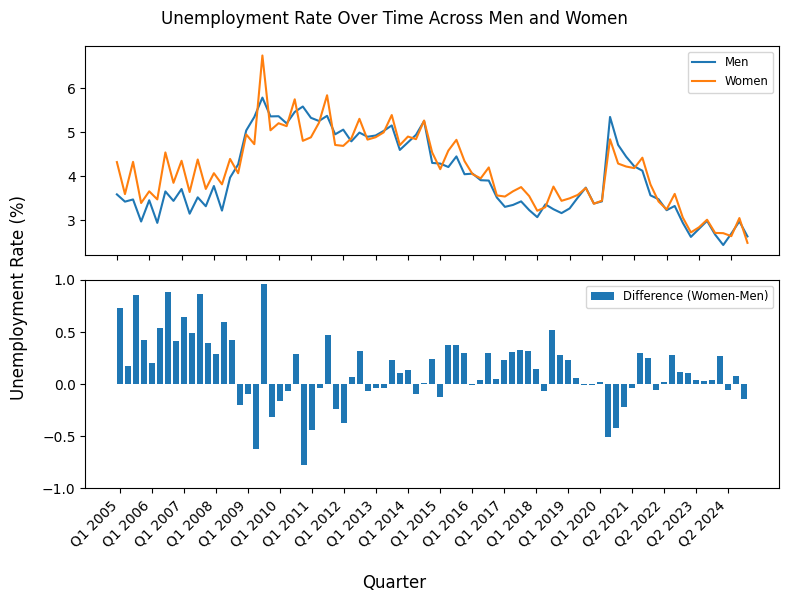

In [28]:
# Select data
x = unemployment_rate_sex_0524.index[::-1] # go from most historic to most recent
x_pos = np.arange(0, len(x), 4) # select every 4th position on x axis to avoid overcrowding
labels = x[::4] # select every 4th label
y1 = unemployment_rate_sex_0524.loc[::-1, 'Men']
y2 = unemployment_rate_sex_0524.loc[::-1, 'Women']
y3 = unemployment_rate_sex_0524.loc[::-1, 'Difference']

# Plot data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,6))
# plt.figure()
axes[0].plot(x, y1, label='Men')
axes[0].plot(x, y2, label='Women')
axes[0].legend(fontsize='small')
axes[0].set_xticks(x_pos) # Display every 4th tick mark
axes[0].tick_params(labelbottom=False) # Hide the x-axis on the top subplot
# axes[1].plot(x, y3, '--g', label='Difference (Women-Men)')
axes[1].bar(x, y3, label='Difference (Women-Men)')
axes[1].legend(fontsize='small')
axes[1].set_xticks(x_pos) # Display every 4th tick mark 
axes[1].set_xticklabels(labels, rotation=45, ha='right') #Display every 4th label
axes[1].set_ylim(-1.0, 1.0)
fig.supxlabel('Quarter')
fig.supylabel('Unemployment Rate (%)')
fig.suptitle('Unemployment Rate Over Time Across Men and Women')
plt.tight_layout()
plt.show()

Judging by the figure here it looks like between men and women the difference in unemployment has been at most 1%, and has been trending closer and closer to 0%.

### Summary and Next Steps

These unemployment metrics show good indications of economic opportunity so far. The overall unemployment rate in Mexico has trended down and has reached an all time low in the last 20 years. Between men and women, the unemployment rates are approaching equal values. However, there are still a few questions. For example, unemployment is more common among younger generations, and there are high rates of informal employment within Mexico. It is unclear whether these rates of informal employment are costing the overall economy, and acting as a barrier to earn higher wages. The answers to these questions could greatly impact the overall picture of the economy.   

Next steps might include:
1. Understanding whether the breakdown of unemployment by age is typical
2. Understanding whether informal employment acts as a barrier to earn higher wages or costs the overall economy
3. Understanding whether informal employment is tied to demographic characteristics like age, sex, education, and socioeconomic status